In [17]:
import qutip as qt
import numpy as np 
import scipy as sp
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import pickle

import matplotlib.ticker as ticker


from scipy.integrate import solve_ivp
from scipy.linalg import sqrtm
from scipy.integrate import simpson

%matplotlib inline

In [18]:



plt.rcParams.update({
    "text.usetex": True,
    #"text.latex.preamble": r"\boldmath",
    #"font.family": "sans-serif",
    #"mathtext.fontset" : "stix",
    "font.family" : "lmodern", #   "font.serif": ["Times New Roman"],
    "font.weight": "bold",
    "text.latex.preamble": r"\usepackage[T1]{fontenc} \usepackage{lmodern} \usepackage{amsmath} \usepackage{mathptmx}\usepackage{amsfonts}",
    #"text.latex.preamble": r"\usepackage[T1]{fontenc}  \usepackage[utf8]{inputenc} \usepackage{amsmath} \usepackage{mathptmx}\usepackage{amsfonts}",
    #
    "xtick.minor.visible": True, 
    "ytick.minor.visible": True,
    
    "ytick.right": True,
    "ytick.left": True,

    "xtick.top": True,
    "xtick.bottom": True,
 
    #
    "xtick.direction": "in",
    "ytick.direction": "in",
    #
    "xtick.major.width": 1.5,     # major tick width in points
    "ytick.major.width": 1.5,     # major tick width in points
    #
    "xtick.minor.width": 1.5,     # minor tick width in points
    "ytick.minor.width": 1.5,     # minor tick width in points
    #
    "xtick.major.pad": 3.0,     # distance to major tick label in points
    "ytick.major.pad": 3.0,     # distance to major tick label in points
    #
    "xtick.minor.pad": 1.4,     # distance to the minor tick label in points
    "ytick.minor.pad": 1.4,     # distance to the minor tick label in points
    #
    "xtick.major.size": 5.5, 
    "ytick.major.size": 5.5,
    
    "xtick.minor.size": 3.5, 
    "ytick.minor.size": 3.5,
    #
    "xtick.labelsize": 20, 
    "ytick.labelsize": 20,
    #
    "legend.frameon": True, 
    "legend.fontsize": 20, 
    "legend.edgecolor": "white",
    "axes.titlesize": 20, 
    "axes.titleweight": "bold",
    "axes.labelsize":20 
})



In [19]:
with open('DataFig2.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [20]:

F2a_tau_list = data["F2a_tau_list"]
F2a_slist = data["F2a_slist"]
F2a_FTs = data["F2a_FTs"]


F2b_tlist_list = data["F2b_tlist_list"]
F2b_fidelity_list = data["F2b_fidelity_list"]

F2c_tau_list = data["F2c_tau_list"]
F2c_slist = data["F2c_slist"]
F2c_tlist_list = data["F2c_tlist_list"]
F2c_thetas = data["F2c_thetas"]
F2c_exact_theta = data["F2c_exact_theta"]

Nsteps = data["Nsteps"]

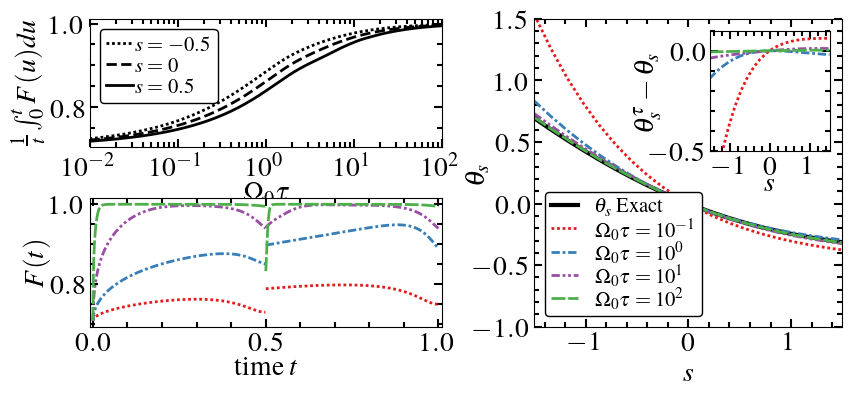

In [23]:
fig = plt.figure(figsize = (10,4))

gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:,1])



######
###### Fig 2a
######
ax1.plot(F2a_tau_list, F2a_FTs[0], color="black", linestyle=(0, (1, 1)), label=r"$s=-0.5$", linewidth=2)
ax1.plot(F2a_tau_list, F2a_FTs[1], color="black", linestyle="--", label=r"$s=0$", linewidth=2)
ax1.plot(F2a_tau_list, F2a_FTs[2], color="black", linestyle="-", label=r"$s=0.5$", linewidth=2)

ax1.set_xlabel(r"$\Omega_0\tau$", labelpad=0)
ax1.set_ylabel(r"$\frac{1}{t} \int_0^tF(u)du$")
ax1.set_xscale("log")


ax1.set_xticks([0.01, 0.1, 1, 10, 100])

ax1.tick_params(axis='x', pad=7)

#ax1.set_ylim((0.75, 1.01))
ax1.set_xlim((0.01, 100))

#ax1.legend(edgecolor="black", framealpha=1,handlelength=1.3, borderpad=0.3, fontsize=15, loc=8, columnspacing=0.2, handletextpad=0.1, ncol=3)
ax1.legend(edgecolor="black", framealpha=1,handlelength=1.3, borderpad=0.3, fontsize=15, loc=0, labelspacing=0.1, handletextpad=0.1)


######
###### Fig 2b
######


ax2.plot(F2b_tlist_list[0][:int(Nsteps/2)]/max(F2b_tlist_list[0]), F2b_fidelity_list[0][:int(Nsteps/2)], color="#e41a1c", label=r"$\Omega_0\tau=10^{-1}$", linestyle=(0, (1, 1)) , linewidth=2)
ax2.plot(F2b_tlist_list[1][:int(Nsteps/2)]/max(F2b_tlist_list[1]), F2b_fidelity_list[1][:int(Nsteps/2)], color="#377eb8", label=r"$\Omega_0\tau=10^0$", linestyle=(0,(3, 1, 1, 1)), linewidth=2)
ax2.plot(F2b_tlist_list[2][:int(Nsteps/2)]/max(F2b_tlist_list[2]), F2b_fidelity_list[2][:int(Nsteps/2)], color="#984ea3", label=r"$\Omega_0\tau=10^1$", linestyle=(0, (3, 1, 1, 1, 1, 1)), linewidth=2)
ax2.plot(F2b_tlist_list[3][:int(Nsteps/2)]/max(F2b_tlist_list[3]), F2b_fidelity_list[3][:int(Nsteps/2)], color="#4daf4a", label=r"$\Omega_0\tau=10^2$", linestyle=(0, (5, 1)), linewidth=2)

ax2.plot(F2b_tlist_list[0][int(Nsteps/2):]/max(F2b_tlist_list[0]), F2b_fidelity_list[0][int(Nsteps/2):], color="#e41a1c",linestyle=(0, (1, 1)) , linewidth=2)
ax2.plot(F2b_tlist_list[1][int(Nsteps/2):]/max(F2b_tlist_list[1]), F2b_fidelity_list[1][int(Nsteps/2):], color="#377eb8",linestyle=(0,(3, 1, 1, 1)), linewidth=2)
ax2.plot(F2b_tlist_list[2][int(Nsteps/2):]/max(F2b_tlist_list[2]), F2b_fidelity_list[2][int(Nsteps/2):], color="#984ea3",linestyle=(0, (3, 1, 1, 1, 1, 1)), linewidth=2)
ax2.plot(F2b_tlist_list[3][int(Nsteps/2):]/max(F2b_tlist_list[3]), F2b_fidelity_list[3][int(Nsteps/2):], color="#4daf4a",linestyle=(0, (5, 1)), linewidth=2)

ax2.set_xlabel(r"time $t$", labelpad=0)
ax2.set_ylabel(r"$F(t)$", labelpad=0)

ax2.set_xlim((-0.01, 1.01))

#ax2.legend(edgecolor="black", framealpha=1,handlelength=1.3, borderpad=0.3, fontsize=15, loc=4, labelspacing = 0.1)


#######################
######################
######################

ax3.plot(F2c_slist, np.array(F2c_exact_theta).real, color="black", label=r"$\theta_s$ Exact", linewidth=3)


ax3.plot(F2c_slist, np.array(F2c_thetas[0]).real,color="#e41a1c", label=r"$\Omega_0\tau=10^{-1}$", linestyle=(0, (1, 1)) , linewidth=2)
ax3.plot(F2c_slist, np.array(F2c_thetas[1]).real,color="#377eb8", label=r"$\Omega_0\tau=10^0$", linestyle=(0,(3, 1, 1, 1)), linewidth=2)
ax3.plot(F2c_slist, np.array(F2c_thetas[2]).real,color="#984ea3", label=r"$\Omega_0\tau=10^1$", linestyle=(0, (3, 1, 1, 1, 1, 1)), linewidth=2)
ax3.plot(F2c_slist, np.array(F2c_thetas[3]).real,color="#4daf4a", label=r"$\Omega_0\tau=10^2$", linestyle=(0, (5, 1)), linewidth=2)


ax3.set_xlabel(r"$s$")
ax3.set_ylabel(r"$\theta_s$", labelpad=-12)
ax3.set_ylim((-1,1.5))
ax3.set_xlim((-1.5,1.5))

ax3.set_box_aspect(1)


ax3.legend(edgecolor="black", framealpha=1, handlelength=1.3, borderpad=0.3, fontsize=15, loc=3, labelspacing=0.1)

left1, bottom1, width1, height1 = [0.63, 0.55, 0.35, 0.3]
ax31 = fig.add_axes([left1, bottom1, width1, height1])
ax31.set_box_aspect(1)

ax31.plot(F2c_slist, (np.array(F2c_exact_theta)-np.array(F2c_thetas[0])).real,color="#e41a1c", label=r"$\Omega_0\tau=10^{-1}$", linestyle=(0, (1, 1)) , linewidth=2)
ax31.plot(F2c_slist, (np.array(F2c_exact_theta)-np.array(F2c_thetas[1])).real,color="#377eb8", label=r"$\Omega_0\tau=10^{0}$", linestyle=(0,(3, 1, 1, 1)), linewidth=2)
ax31.plot(F2c_slist, (np.array(F2c_exact_theta)-np.array(F2c_thetas[2])).real,color="#984ea3", label=r"$\Omega_0\tau=10^{1}$", linestyle=(0, (3, 1, 1, 1, 1, 1)), linewidth=2)
ax31.plot(F2c_slist, (np.array(F2c_exact_theta)-np.array(F2c_thetas[3])).real,color="#4daf4a", label=r"$\Omega_0\tau=10^2$", linestyle=(0, (5, 1)), linewidth=2)

ax31.set_ylabel(r"$\theta_s^\tau - \theta_s$", labelpad=-8)

ax31.set_xlabel(r"$s$", labelpad=-6)

ax31.set_ylim((-0.5, 0.1))
ax31.set_xlim((-1.5, 1.5))





plt.subplots_adjust(hspace=0.4)


#plt.savefig("Fig2_test.pdf", bbox_inches="tight")


